In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install sklearn

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting default style for seaborn plot

In [3]:
# Reading in the complete dataset into a DataFrame

full_energy_data = pd.read_csv("/Users/shubaprasadh/Downloads/FAOSTAT_data_allcountries_energyuse1.csv")

full_energy_data

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GN,Energy Use,2,Afghanistan,72184,Use in agriculture,6801,Gas-Diesel oil,2019,2019,Terajoule,1255.7589,F,FAO estimate
1,GN,Energy Use,2,Afghanistan,72184,Use in agriculture,6800,Motor Gasoline,2019,2019,Terajoule,1.1439,F,FAO estimate
2,GN,Energy Use,2,Afghanistan,72184,Use in agriculture,6802,Natural gas (including LNG),2019,2019,Terajoule,89.9388,F,FAO estimate
3,GN,Energy Use,2,Afghanistan,72184,Use in agriculture,6809,Coal,2019,2019,Terajoule,199.8232,F,FAO estimate
4,GN,Energy Use,2,Afghanistan,72184,Use in agriculture,6807,Electricity,2019,2019,Terajoule,417.6000,F,FAO estimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,GN,Energy Use,181,Zimbabwe,72184,Use in agriculture,6800,Motor Gasoline,2019,2019,Terajoule,788.5400,F,FAO estimate
1445,GN,Energy Use,181,Zimbabwe,72184,Use in agriculture,6805,Liquefied petroleum gas (LPG),2019,2019,Terajoule,103.3323,F,FAO estimate
1446,GN,Energy Use,181,Zimbabwe,72184,Use in agriculture,6804,Fuel oil,2019,2019,Terajoule,1.8112,F,FAO estimate
1447,GN,Energy Use,181,Zimbabwe,72184,Use in agriculture,6807,Electricity,2019,2019,Terajoule,1665.3600,F,FAO estimate


In [5]:
# Getting basic information about the dataset and checking for Null values

full_energy_data.info()
full_energy_data.isna().apply(pd.value_counts)

# From the below results we can see that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       1449 non-null   object 
 1   Domain            1449 non-null   object 
 2   Area Code (FAO)   1449 non-null   int64  
 3   Area              1449 non-null   object 
 4   Element Code      1449 non-null   int64  
 5   Element           1449 non-null   object 
 6   Item Code         1449 non-null   int64  
 7   Item              1449 non-null   object 
 8   Year Code         1449 non-null   int64  
 9   Year              1449 non-null   int64  
 10  Unit              1449 non-null   object 
 11  Value             1449 non-null   float64
 12  Flag              1449 non-null   object 
 13  Flag Description  1449 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 158.6+ KB


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
False,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449


In [14]:
# Cleaning the dataset - removing columns that are redundant/not relevant to the analysis

energy_data = full_energy_data.drop(['Domain Code', 'Domain', 'Element Code', 'Element', 'Year Code', 'Flag Description'], axis=1)

energy_data

,Area Code (FAO),Area,Item Code,Item,Year,Unit,Value,Flag
0,2,Afghanistan,6801,Gas-Diesel oil,2019,Terajoule,1255.7589,F
1,2,Afghanistan,6800,Motor Gasoline,2019,Terajoule,1.1439,F
2,2,Afghanistan,6802,Natural gas (including LNG),2019,Terajoule,89.9388,F
3,2,Afghanistan,6809,Coal,2019,Terajoule,199.8232,F
4,2,Afghanistan,6807,Electricity,2019,Terajoule,417.6000,F
...,...,...,...,...,...,...,...,...
1444,181,Zimbabwe,6800,Motor Gasoline,2019,Terajoule,788.5400,F
1445,181,Zimbabwe,6805,Liquefied petroleum gas (LPG),2019,Terajoule,103.3323,F
1446,181,Zimbabwe,6804,Fuel oil,2019,Terajoule,1.8112,F
1447,181,Zimbabwe,6807,Electricity,2019,Terajoule,1665.3600,F


In [19]:
# Seeing how many unique items there are; helps with gauging how many different graphs / groupings there will be 

print(energy_data["Item"].nunique())
energy_data["Item"].unique()

8


array(['Gas-Diesel oil', 'Motor Gasoline', 'Natural gas (including LNG)',
       'Coal', 'Electricity', 'Total Energy',
       'Liquefied petroleum gas (LPG)', 'Fuel oil'], dtype=object)

In [45]:
# Create 7 separate DataFrames for each item and sorting countries from greatest to least usage of that item

# Gas diesel oil
gas_diesel_oil = energy_data.loc[energy_data["Item"]=="Gas-Diesel oil"].drop(['Area Code (FAO)', 
                                                                              'Item Code', 'Year',
                                                                            'Unit', 'Flag'], axis=1)
gas_diesel_oil = gas_diesel_oil.sort_values('Value', ascending = False)
display(gas_diesel_oil.head(10))

# Motor gas
motor_gas = energy_data.loc[energy_data["Item"]=="Motor Gasoline"].drop(['Area Code (FAO)', 
                                                                              'Item Code', 'Year',
                                                                            'Unit', 'Flag'], axis=1)
motor_gas = motor_gas.sort_values('Value', ascending = False)
display(motor_gas.head(10))

# Natural gas
natural_gas = energy_data.loc[energy_data["Item"]=="Natural gas (including LNG)"].drop(['Area Code (FAO)', 
                                                                              'Item Code', 'Year',
                                                                            'Unit', 'Flag'], axis=1)
natural_gas = natural_gas.sort_values('Value', ascending = False)
display(natural_gas.head(10))

# Coal 
coal = energy_data.loc[energy_data["Item"]=="Coal"].drop(['Area Code (FAO)', 
                                                                              'Item Code', 'Year',
                                                                            'Unit', 'Flag'], axis=1)
coal = coal.sort_values('Value', ascending = False)
display(coal.head(10))

# Electricity 
electricity = energy_data.loc[energy_data["Item"]=="Electricity"].drop(['Area Code (FAO)', 
                                                                              'Item Code', 'Year',
                                                                            'Unit', 'Flag'], axis=1)
electricity = electricity.sort_values('Value', ascending = False)
display(electricity.head(10))

# Liquified petroleum gas
liq_pg = energy_data.loc[energy_data["Item"]=="Liquefied petroleum gas (LPG)"].drop(['Area Code (FAO)', 
                                                                              'Item Code', 'Year',
                                                                            'Unit', 'Flag'], axis=1)
liq_pg = liq_pg.sort_values('Value', ascending = False)
display(liq_pg.head(10))

# Fuel oil 
fuel_oil = energy_data.loc[energy_data["Item"]=="Fuel oil"].drop(['Area Code (FAO)', 
                                                                              'Item Code', 'Year',
                                                                            'Unit', 'Flag'], axis=1)
fuel_oil = fuel_oil.sort_values('Value', ascending = False)
display(fuel_oil.head(10))


,Area,Item,Value
272,China,Gas-Diesel oil,638715.4748
294,"China, mainland",Gas-Diesel oil,629301.5600
1381,United States of America,Gas-Diesel oil,333508.0000
176,Brazil,Gas-Diesel oil,298187.8000
234,Canada,Gas-Diesel oil,164741.6000
689,Japan,Gas-Diesel oil,163898.8000
45,Argentina,Gas-Diesel oil,153759.4000
860,Mexico,Gas-Diesel oil,141831.2000
1101,Russian Federation,Gas-Diesel oil,123019.5600
487,France,Gas-Diesel oil,121457.8000


,Area,Item,Value
1382,United States of America,Motor Gasoline,180513.6400
273,China,Motor Gasoline,110368.3769
295,"China, mainland",Motor Gasoline,109945.1576
235,Canada,Motor Gasoline,51520.9000
1102,Russian Federation,Motor Gasoline,50178.8987
963,Nigeria,Motor Gasoline,47014.5149
690,Japan,Motor Gasoline,28520.8010
177,Brazil,Motor Gasoline,15258.5174
1419,Viet Nam,Motor Gasoline,8284.1000
66,Australia,Motor Gasoline,6981.6800


,Area,Item,Value
643,Iran (Islamic Republic of),Natural gas (including LNG),96353.1468
930,Netherlands,Natural gas (including LNG),96035.6000
1383,United States of America,Natural gas (including LNG),71524.6000
1103,Russian Federation,Natural gas (including LNG),68438.1324
236,Canada,Natural gas (including LNG),43917.4000
1151,Saudi Arabia,Natural gas (including LNG),15823.8164
47,Argentina,Natural gas (including LNG),15767.2820
122,Belgium,Natural gas (including LNG),13658.4000
304,Colombia,Natural gas (including LNG),11692.5937
1000,Pakistan,Natural gas (including LNG),11589.2003


,Area,Item,Value
299,"China, mainland",Coal,598439.7720
277,China,Coal,598439.7720
1052,Poland,Coal,74923.2000
630,India,Coal,55477.4397
1220,South Africa,Coal,43478.1600
307,Colombia,Coal,30700.1225
694,Japan,Coal,14690.6030
708,Kazakhstan,Coal,11735.9040
181,Brazil,Coal,11126.7681
1076,Republic of Korea,Coal,5332.7697


,Area,Item,Value
631,India,Electricity,776039.760
278,China,Electricity,464134.151
300,"China, mainland",Electricity,463808.880
1387,United States of America,Electricity,174671.280
647,Iran (Islamic Republic of),Electricity,138967.200
182,Brazil,Electricity,112250.160
1404,Uzbekistan,Electricity,71902.332
1107,Russian Federation,Electricity,69556.464
1077,Republic of Korea,Electricity,62820.000
866,Mexico,Electricity,46252.800


,Area,Item,Value
1384,United States of America,Liquefied petroleum gas (LPG),95914.9400
490,France,Liquefied petroleum gas (LPG),11323.6200
529,Germany,Liquefied petroleum gas (LPG),10490.1909
237,Canada,Liquefied petroleum gas (LPG),9441.0800
891,Morocco,Liquefied petroleum gas (LPG),4512.4200
863,Mexico,Liquefied petroleum gas (LPG),4361.0600
267,Chile,Liquefied petroleum gas (LPG),4020.5000
1369,United Kingdom of Great Britain and Northern I...,Liquefied petroleum gas (LPG),3963.7400
335,Côte d'Ivoire,Liquefied petroleum gas (LPG),3740.4840
275,China,Liquefied petroleum gas (LPG),3661.9991


,Area,Item,Value
1153,Saudi Arabia,Fuel oil,94856.7314
685,Jamaica,Fuel oil,32781.1863
351,Cuba,Fuel oil,27676.4064
1105,Russian Federation,Fuel oil,18724.5920
637,Indonesia,Fuel oil,7101.3563
238,Canada,Fuel oil,6722.5600
1363,United Arab Emirates,Fuel oil,5885.1051
268,Chile,Fuel oil,5405.5200
530,Germany,Fuel oil,5054.5186
57,Armenia,Fuel oil,4268.4349


In [48]:
# Create a totals / overall calculations DataFrame and sorting it from greatest to least energy usage

overall_energy = energy_data.loc[energy_data["Item"]=="Total Energy"].drop(['Area Code (FAO)', 
                                                                              'Item Code', 'Year',
                                                                            'Unit', 'Flag'], axis=1)
overall_energy = overall_energy.sort_values('Value', ascending = False)
display(overall_energy.head(10))

# Set proportion of total global energy consumption column 

# Calculate and display total global energy use due to agriculture 
totalEnergy = overall_energy["Value"].sum()
print("The total global energy usage amount (in terajoules) due to agriculture is "+str(totalEnergy)+".")

# make new column for proportion of global total 
overall_energy["Proportion of Global Total"] = overall_energy["Value"]/totalEnergy
display(overall_energy.head(10))

,Area,Item,Value
279,China,Total Energy,1.821655e+06
301,"China, mainland",Total Energy,1.810934e+06
1388,United States of America,Total Energy,8.576503e+05
632,India,Total Energy,8.430029e+05
183,Brazil,Total Energy,4.383317e+05
648,Iran (Islamic Republic of),Total Energy,3.454436e+05
1108,Russian Federation,Total Energy,3.348217e+05
241,Canada,Total Energy,3.138144e+05
696,Japan,Total Energy,2.206536e+05
867,Mexico,Total Energy,2.085348e+05


The total global energy usage amount (in terajoules) due to agriculture is 11022449.101100001.


,Area,Item,Value,Proportion of Global Total
279,China,Total Energy,1.821655e+06,0.165268
301,"China, mainland",Total Energy,1.810934e+06,0.164295
1388,United States of America,Total Energy,8.576503e+05,0.077809
632,India,Total Energy,8.430029e+05,0.076481
183,Brazil,Total Energy,4.383317e+05,0.039767
648,Iran (Islamic Republic of),Total Energy,3.454436e+05,0.031340
1108,Russian Federation,Total Energy,3.348217e+05,0.030376
241,Canada,Total Energy,3.138144e+05,0.028470
696,Japan,Total Energy,2.206536e+05,0.020019
867,Mexico,Total Energy,2.085348e+05,0.018919


In [53]:
overall_energy["Prop. Gas,Diesel,Oil"] = np.nan
overall_energy["Prop. Motor Gas"] = np.nan
overall_energy["Prop. Natural Gas"] = np.nan
overall_energy["Prop. Coal"] = np.nan
overall_energy["Prop. Electricity"] = np.nan
overall_energy["Prop. Liq. Petroleum Gas"] = np.nan
overall_energy["Prop. Fuel Oil"] = np.nan

# for area in overall_energy["Area"]:
#     if area.isin(gas_diesel_oil["Area"]):
#         gas_diesel_oil["Value"]/overall_energy["Value"], None)
# overall_energy.head()

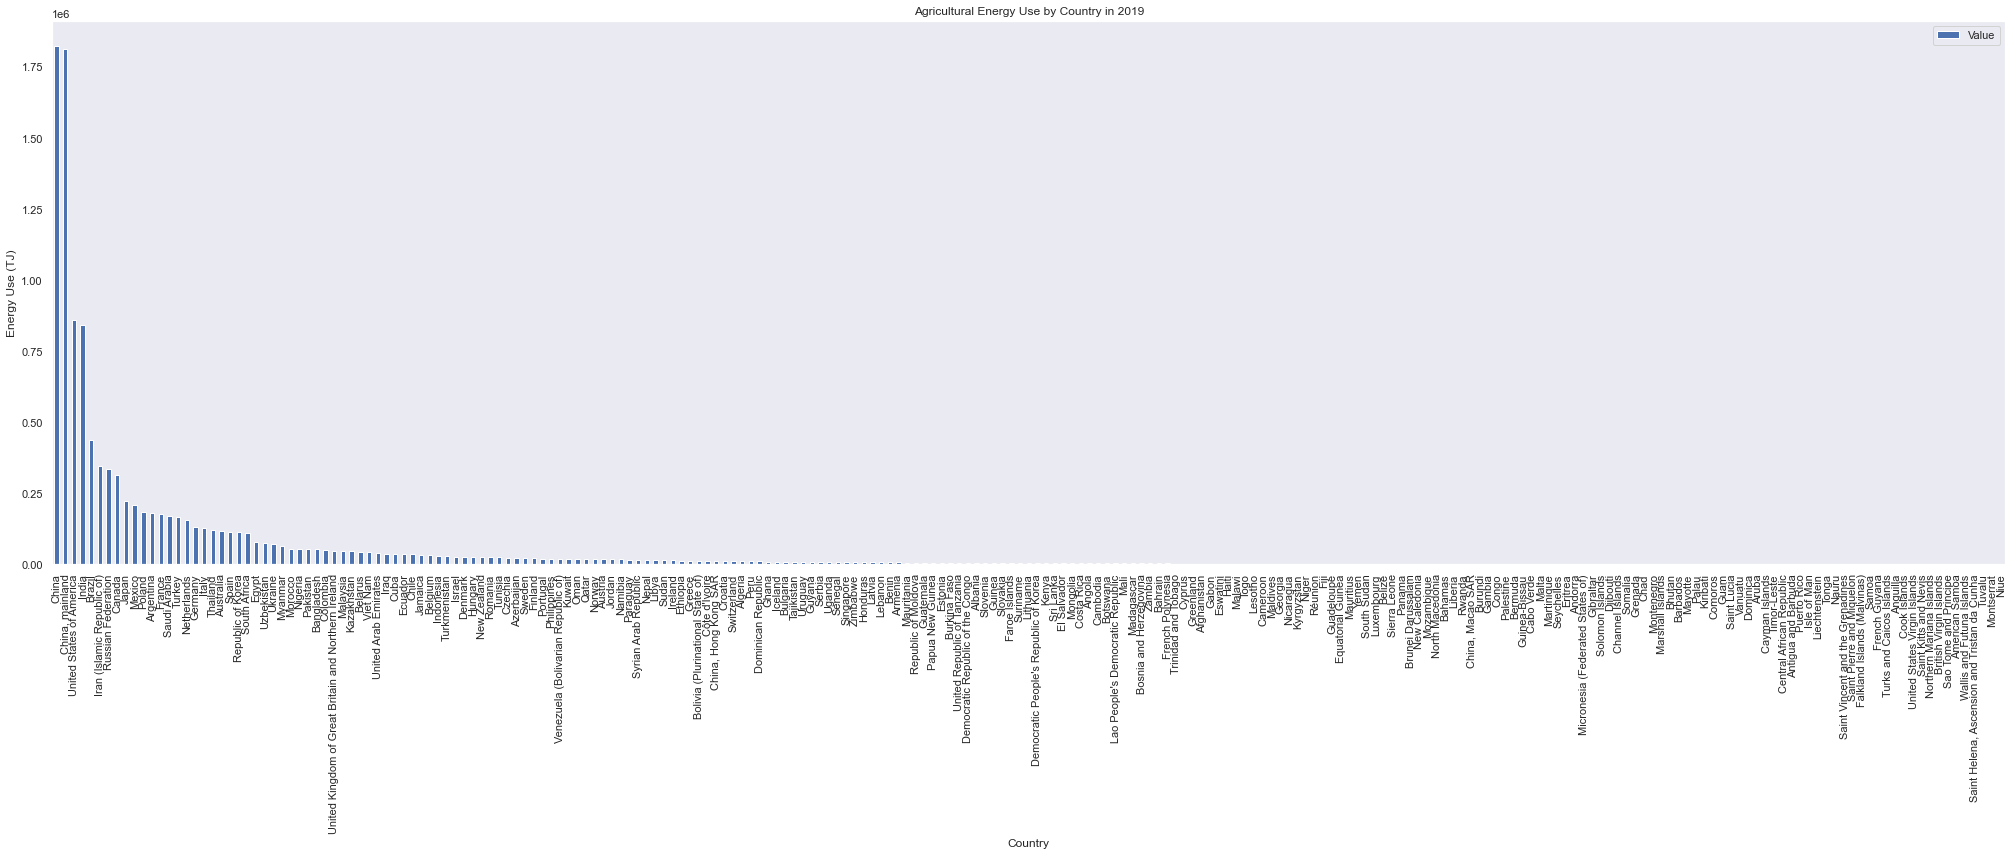

In [56]:
# Bar graph of global energy use totals

overall_energy.plot(kind = "bar", x = "Area", y="Value", figsize = (35,10))
plt.title("Agricultural Energy Use by Country in 2019")
plt.xlabel("Country")
plt.ylabel("Energy Use (TJ)")
plt.grid(False)
plt.show()

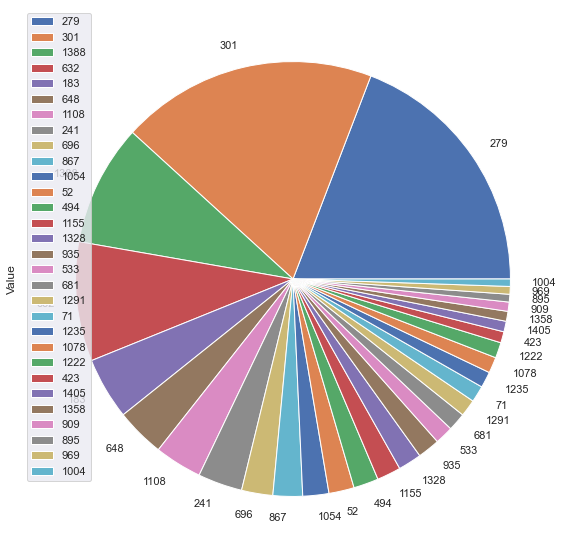

In [61]:
# Pie chart of top 50 highest energy use countries' energy uses as proportion of global total 

piplot = overall_energy.head(30).plot.pie(y='Value',figsize = (10,10))